In [7]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [8]:

n_ancilla =3 #we are dealong with the 3 qubit case
shots = 1024
backend = AerSimulator()


phase_list = np.linspace(0,np.pi, 50)  # 50 different omega values varryin form 0to pi
prob_measure_001 = [] #Track Probability of measuring |001> (target phase 1/8)


In [12]:
#Building QPE circuit

for omega in phase_list:
    #Build QPE circuit
    qc = QuantumCircuit(n_ancilla+1, n_ancilla)
    qc.x(n_ancilla) #system qubit eigen state
    qc.h(range(n_ancilla)) #Handarmard on ancilla

    for j in range(n_ancilla):
        qc.cp(2*omega*2**j, j, n_ancilla)

    def inverse_qft(qc, n):
        for qubit in range(n//2):
            qc.swap=(qubit, n-qubit-1)
        for j in range(n):
            for k in range(j):
                qc.cp(-np.pi/(2**(j-k)), k , j)
            qc.h(j)
        return qc

    inverse_qft(qc, n_ancilla), range(n_ancilla)

    qc.measure(range(n_ancilla), range(n_ancilla))

    #Execute
    tqc = transpile(qc, backend)
    job = backend.run([tqc], shots = shots)
    result = job.result()
    counts = result.get_counts(0)

    prob = counts.get('001', 0)/shots

    prob_measure_001.append(prob)


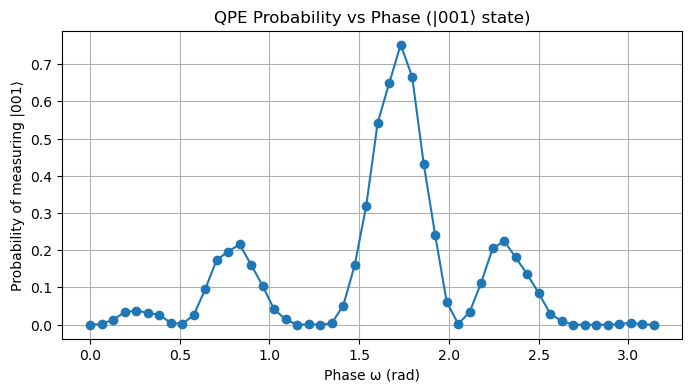

In [13]:
#plot

plt.figure(figsize=(8,4))
plt.plot(phase_list, prob_measure_001, marker='o')
plt.title('QPE Probability vs Phase (|001⟩ state)')
plt.xlabel('Phase ω (rad)')
plt.ylabel('Probability of measuring |001⟩')
plt.grid(True)
plt.show()

Quantum Phase Estimation: Stepwise Explanation with Expected Outcomes

	1.	Initialization of Qubits
	•	Action: All qubits are initialized in the |0⟩ state.
	•	Expected Outcome: System qubit is ready to hold eigenstate, ancilla qubits are ready to store phase information.
	•	Why: Quantum algorithms always start from a known state so that operations behave predictably.
    
	2.	Prepare System Eigenstate
	•	Action: Apply an X gate to the system qubit → |1⟩.
	•	Expected Outcome: System qubit is now in a valid eigenstate of the unitary operator U.
	•	Why: QPE requires a known eigenstate to encode the corresponding eigenphase into ancilla qubits.
    
	3.	Create Superposition on Ancilla
	•	Action: Apply Hadamard (H) gates to all ancilla qubits.
	•	Expected Outcome: Ancilla register becomes a superposition of all possible binary states:

(|0⟩ + |1⟩)⊗n


	•	Why: Superposition allows parallel evaluation of the phase in all possible states — this is the foundation of quantum parallelism.

	4.	Phase Encoding with Controlled-U Operations
	•	Action: Apply controlled-phase rotations (cp(2*omega*2^j)) from each ancilla qubit to the system qubit.
	•	Expected Outcome: Each ancilla state accumulates a phase proportional to 2^j * ω.
	•	Why: Encodes the target frequency/phase in the amplitudes of the ancilla register. This is equivalent to “modulating” the ancilla qubits with the signal frequency.
    
	5.	Apply Inverse Quantum Fourier Transform (IQFT)
	•	Action: Perform swaps and controlled-phase rotations + Hadamards on ancilla.
	•	Expected Outcome: Phase information is converted from Fourier domain to computational basis, so each binary outcome approximates the phase.
	•	Why: IQFT decodes the phase accumulated in superpositions into readable bitstrings.
    
	6.	Measurement of Ancilla
	•	Action: Measure ancilla qubits in the computational basis.
	•	Expected Outcome: Obtain a binary string representing the closest approximation of the phase. For n=3 and ω=π/4, the most probable outcome is 001.
	•	Why: Measurement collapses the superposition, producing classical information about the quantum phase.
    
	7.	Sweep Phase to Observe Filter Response
	•	Action: Vary ω from 0 to π, record probability of measuring |001⟩.
	•	Expected Outcome: Probability vs phase plot shows a sinc-like curve. Peak occurs at the true phase ω = π/4.
	•	Why: QPE with finite ancilla qubits approximates a Fourier series → the resulting amplitude distribution is a Dirichlet kernel, which manifests as a sinc. The width of the main lobe is inversely proportional to n.
    
	8.	Interpretation
	•	Outcome: The QPE circuit behaves like a frequency-selective filter:
	•	Main lobe → target frequency detection
	•	Side lobes → small probabilities for nearby frequencies
	•	Why Expected: Finite register QPE encodes phase information in superpositions → Fourier transform of finite-length sequence naturally produces sinc-shaped response.
    
	9.	Key Insights
	•	Increasing ancilla qubits (n) → narrower main lobe → higher frequency resolution
	•	QPE’s sinc response is natural but not optimal — side lobes allow small leakage into neighboring frequencies
	•	Leads directly into Quantum Signal Processing (QSP): replacing sinc with polynomial-shaped filters (e.g., Chebyshev low-pass) to achieve sharper cutoff and controlled ripple.